# Barcamp Random Forest

## What are we going to do during the workshop?

- install python 
- install jupyter notebook
- install libraries & import them
  - pandas & scikit learn
- get data from kaggle
- introduction to pandas 
- first look at data from kaggle 
- train a decision tree 
- train a random forest 
- What about the performance?

This repository will consist of a jupyternootebook file which contains the documentation of what
we will be looking at and all python code needed. 


## Installation of python & jupyter

The installation can be either done through homebrew or through anaconda and data from kaggle will be used. 
Since anaconda is a GUI Tool no further documentation will be given. For homebrew the following commands need to be run 
in a terminal

- Install homebrew on your machine
```console
$ /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
```
<br>

- Update brew 
```console
$ brew update
```
<br>

- Install python 
```console
$ brew install python
```
<br>

- Install jupyter
```console 
$ brew install jupyter
```
<br>

- Start jupyter lab
```console
$ jupyter lab
```

from here on everything else will be done in the jupyter notebook.

## Additional library

```console
$ brew install graphviz
```

## Disclaimer

The above mentioned method is not recommended for active use in work enviroments. 
Please use additional libraries like __pyenv__, __pipenv__ or __venv__. 
With these virtual enviroments can be created and used for different projects. The usage of a virtual enviroment per project 
is __very__ pythonic and helps prevent usual problems like library incompatibilities.     

## Install pandas and Scikit learn

In [1]:
!pip install --upgrade pip
!pip install pandas
!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import Image
from IPython.display import display
plt.rcParams['figure.figsize'] = [15, 10]
pd.set_option('display.max_rows', None)

## Cross-industry standard process for data mining
More information can be found e. g. in https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining. <br>
Usually the _business understanding_, _data understanding_, and _data preparation_ take about 80% of the time in a machine learning/data mining/ data science project. For large or intricated datasets each of the steps can take up to several weeks.  

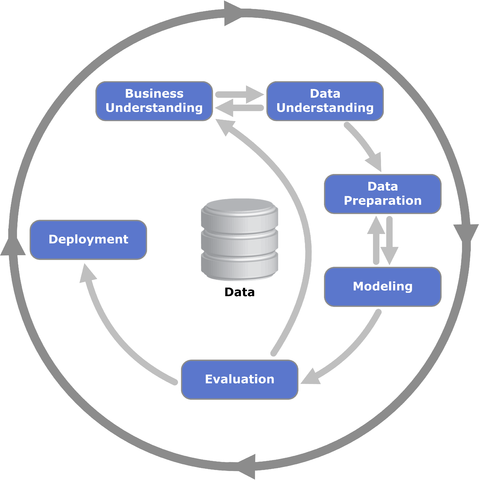

In [3]:
Image(filename='images/crisp_dm.png')

## Libraries we will be using in this little Workshop
We will be using mostly the following libraries:
1. pandas to manipulate and handle the data
2. matplotlib is internally used by pandas to visulise the data.
3. sklearn to prepare our data for more intricated parts of the data preparation and modeling
4. numpy is used internally used by both pandas, as well as sklearn to handle the data. 

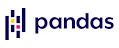

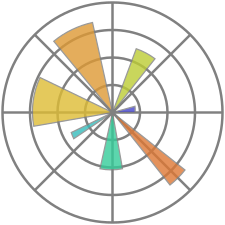

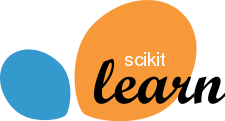

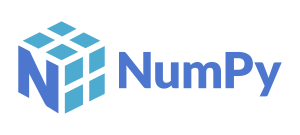

In [4]:
display(Image(filename='images/pandas.png'), Image(filename='images/Matplotlib.png'), Image(filename='images/sklearn.png'), Image(filename='images/numpy.png'))

## Iris Flower Dataset 
https://en.wikipedia.org/wiki/Iris_flower_data_set <br>
The iris dataset is one of the best known datasets. It was one of the first easily and readily available datasets used for machine learning tasks. Today it is almost exclusively used for education purposes. We will have a look at the dataset and get to know the most basic pandas functionalities. <br>
For even more examples on the iris dataset https://www.kaggle.com/uciml/iris/code


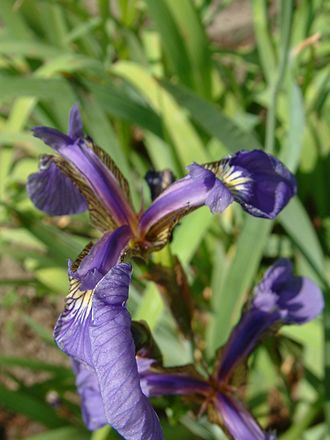

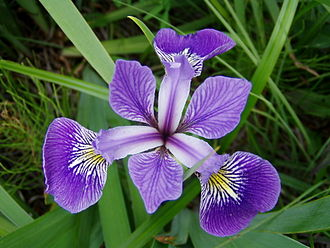

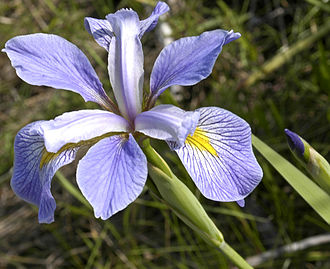

In [5]:
display(Image(filename='images/setosa.jpeg'), Image(filename='images/veriscolor.jpeg'), Image(filename='images/virginica.jpeg'))

First we need to load the data into memory. Their exist a wide variety of functions to load all type of dataformats into a pandas framework. Also several types of connections to databases can be used. We will only use data in the csv format, which is also widely used.

In [6]:
df_iris = pd.read_csv('data/iris_data.csv')

The ```read``` pandas function returns an object called data frame, which is in its core a tabular data object. This object is well known from the R language. Pandas implements many of the functions of an R-dataframe.

After loading the data into memory and making it accessible in the ```df_iris``` DataFrame we want to inspect the data. For this we will start by using the functions ```info()```, ```describe()```, ```head()```. It is easy to understand what this functions do, when looking at the examples.

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length [cm]  150 non-null    float64
 1   sepal width [cm]   150 non-null    float64
 2   petal length [cm]  150 non-null    float64
 3   petal width [cm]   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df_iris.describe()

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm]
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df_iris.columns

Index(['sepal length [cm]', 'sepal width [cm]', 'petal length [cm]',
       'petal width [cm]', 'class'],
      dtype='object')

In [10]:
df_iris.head(n=10)

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## How to approach a dataset
To draw meaningful conclusions we need to understand our data. This can be done in through the visualisation. We can answer a few questions that help us
1. How was the data collected
  - corrupted data
  - missing data
  - measurement error
2. What kind of measurement do the "columns" represent (e. g. what is the sepal length or width?) 
3. How are the values for each measurement distributed (variance, mean, median, ...) 
  - in the sample 
  - in the general population
4. Do the values depend on each other (e. g. covariance) 

## Data Visualisation 
There is a large amount of different charts available. These can be accessed direclty through pandas, which uses matplotlib as backend, or through other libraries. Popular choice nowadays include apart from matplotlib e. g. seaborn or plotly. We will show three differen types of charts, namely ```hist()```, ```boxplot()```, and ```plot.scatter()```. 

array([[<AxesSubplot:title={'center':'sepal length [cm]'}>,
        <AxesSubplot:title={'center':'sepal width [cm]'}>],
       [<AxesSubplot:title={'center':'petal length [cm]'}>,
        <AxesSubplot:title={'center':'petal width [cm]'}>]], dtype=object)

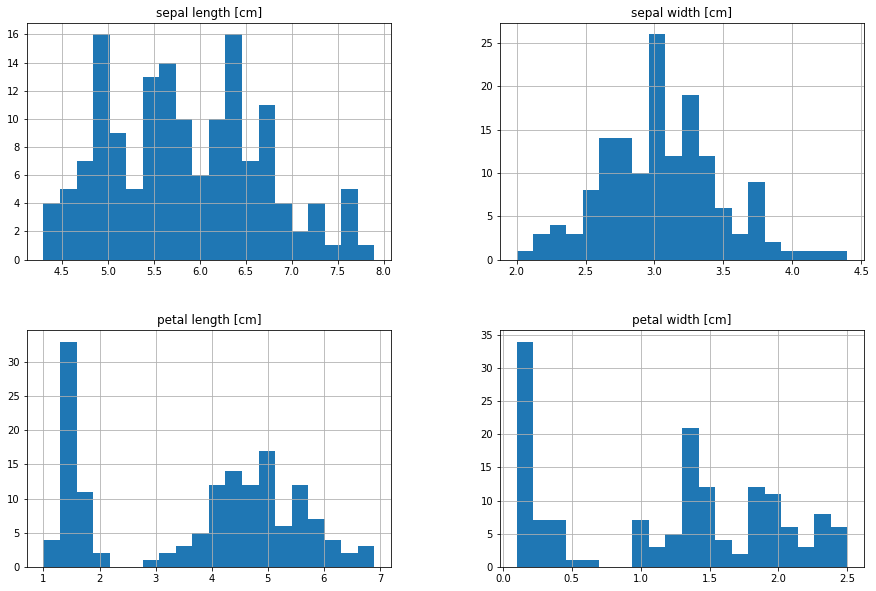

In [11]:
df_iris.hist(bins=20,
             column=None, by=None, grid=True, 
             xlabelsize=None, ylabelsize=None, 
             sharex=False, sharey=False, legend=False)

Histograms are formed by counting all events in a given __bin__ or __bucket__. This works as follows 
1. define bins (binning)
2. iterate over all selected events and assign them to the corresponding bin
3. display the count in every bin
The bins are often equidistant. To compare two histograms it is important to also consider the binning.

<AxesSubplot:>

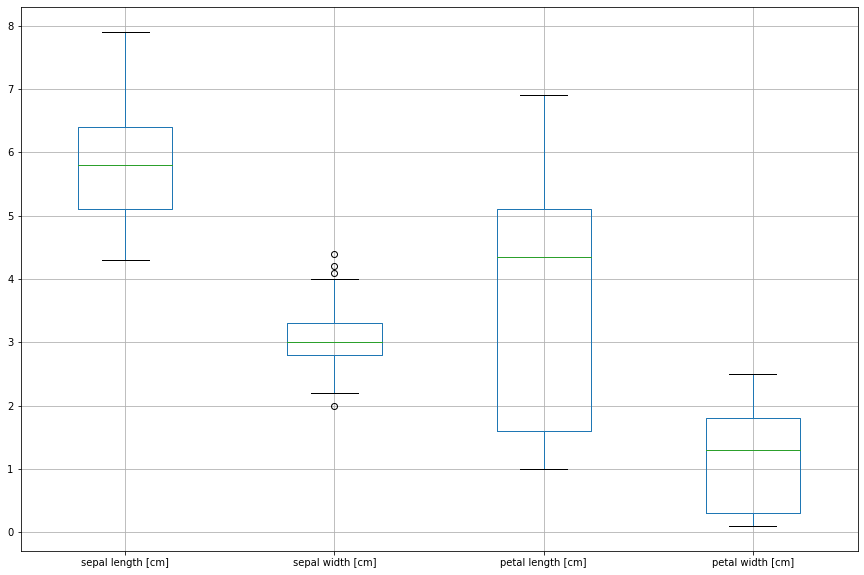

In [12]:
df_iris.boxplot(column=['sepal length [cm]', 'sepal width [cm]', 'petal length [cm]', 'petal width [cm]'], by=None)

Boxplots display the distribution of values in a dataframe column through their quartiles. The box extends from Q1 to Q3 and the black vertical lines (whiskers) extend up to 1.5\* *IQR(inter quantile range)*. The green line is the median.

<AxesSubplot:title={'center':'sepal length [cm]'}, xlabel='class'>

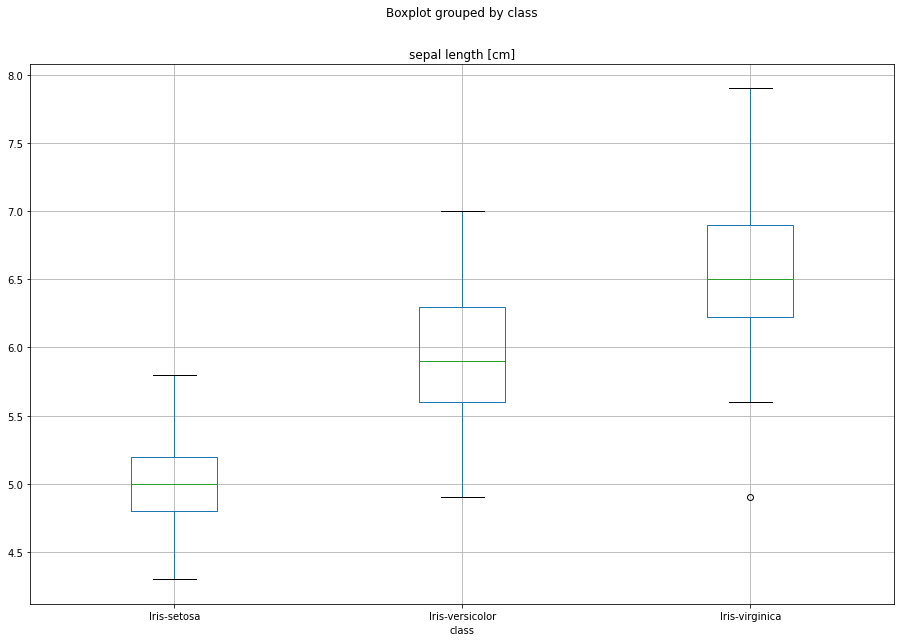

In [13]:
df_iris.boxplot(column=['sepal length [cm]'], by='class')

<AxesSubplot:xlabel='sepal length [cm]', ylabel='petal length [cm]'>

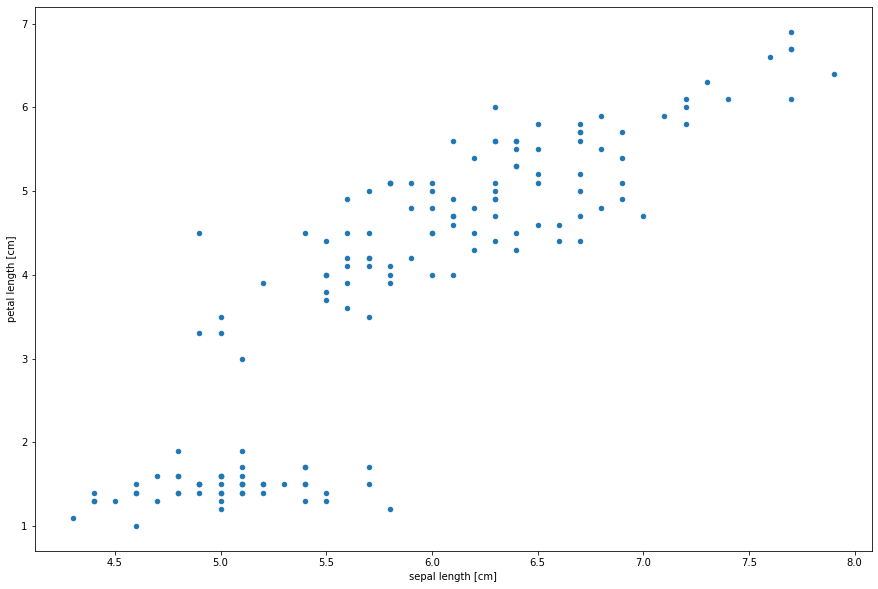

In [14]:
df_iris.plot.scatter(x='sepal length [cm]', y='petal length [cm]')

Scatter plots are mostly used to express correlations between two variables. 

## Data Frame manipulation
There are many ways to manipulate the data in the dataframe. Some basic examples will be shown. For more in detail have a look at a *cheat sheet* e. g.:<br>
https://www.datacamp.com/community/blog/python-pandas-cheat-sheet <br>

1. Select a column (also calles pd.Series)
2. Apply a selection condition
3. Return a specific row
4. Create a new column
5. Encoding

### 1. Select a column
Select a column and assign to a Series variable

In [15]:
sepal_length = df_iris['sepal length [cm]']
sepal_length.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length [cm], dtype: float64

### 2. Apply a selection condition

In [16]:
large_sepal_length = df_iris[df_iris['sepal length [cm]'] > 6]
large_sepal_and_petal_length = df_iris[(df_iris['sepal length [cm]'] > 6) & (df_iris['petal length [cm]'] > 4)]

### 3. Return a specific row

In [17]:
df_iris.iloc[0]

sepal length [cm]            5.1
sepal width [cm]             3.5
petal length [cm]            1.4
petal width [cm]             0.2
class                Iris-setosa
Name: 0, dtype: object

### 4. Create a new column

In [18]:
df_iris['sepal lenght [km]'] = df_iris['sepal length [cm]']/(100*1000)

In [19]:
df_iris.head(1)

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],class,sepal lenght [km]
0,5.1,3.5,1.4,0.2,Iris-setosa,0.000051


In [20]:
# remove columns from the dataframe
df_iris.drop(columns=['sepal lenght [km]'], inplace=True)

### 5. Encoding
Usually it is much easier to use numerical variables instead of string based categorie both for data exploring, as well as machine learning. Two often used methods are called __integer label__ and __one-hot__ encoding. 

In [21]:
from sklearn import preprocessing

#integer encoding
le = preprocessing.LabelEncoder()
df_iris['class_le'] = le.fit_transform(df_iris['class'].values)

In [22]:
df_iris = pd.get_dummies(df_iris, columns=['class'])

In [23]:
df_iris.head(10)

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],class_le,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
5,5.4,3.9,1.7,0.4,0,1,0,0
6,4.6,3.4,1.4,0.3,0,1,0,0
7,5.0,3.4,1.5,0.2,0,1,0,0
8,4.4,2.9,1.4,0.2,0,1,0,0
9,4.9,3.1,1.5,0.1,0,1,0,0


## Decision Tree
The simplest tree-like algorithm is calles decision Tree. An example is given below, which can be used to decide whether a apple tree will yield eatble fruits. In the first node the 'age' is used. If it is yound no fruit is expected. The second node checks whether is is a cultivated variety. When it is a natural variant the quality of the soil needs to be taken into account as well. The "age" or the "soil quality" are usually called features in machine learning.  

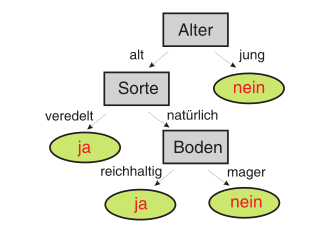

In [24]:
Image(filename='images/Entscheidungsbaum.png') 

The sk-learn interface has become the de-facto industry standard. It usually consists of a fit function which takes the training data as a 2d array and a target as a 1d array. To evaluate a new case we then use the predict method.

In [25]:
from sklearn import tree
# more details in https://scikit-learn.org/stable/modules/classes.html?highlight=tree#module-sklearn.tree
from sklearn.metrics import confusion_matrix
import graphviz

In [26]:
classifier = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
# training data with the features
X = df_iris[['sepal length [cm]', 'sepal width [cm]', 'petal length [cm]', 'petal width [cm]']]
# target lable encoded as 0: setosa, 1: versicolor, 2: virginica
Y = df_iris['class_le']
classifier.fit(X, Y)

DecisionTreeClassifier(max_depth=2, random_state=0)

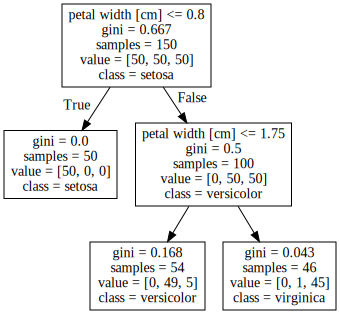

In [27]:
result_data = tree.export_graphviz(classifier, out_file=None, feature_names=X.columns, class_names=['setosa', 'versicolor', 'virginica']) 
graph = graphviz.Source(result_data) 
graph

### What is the gini impurity?

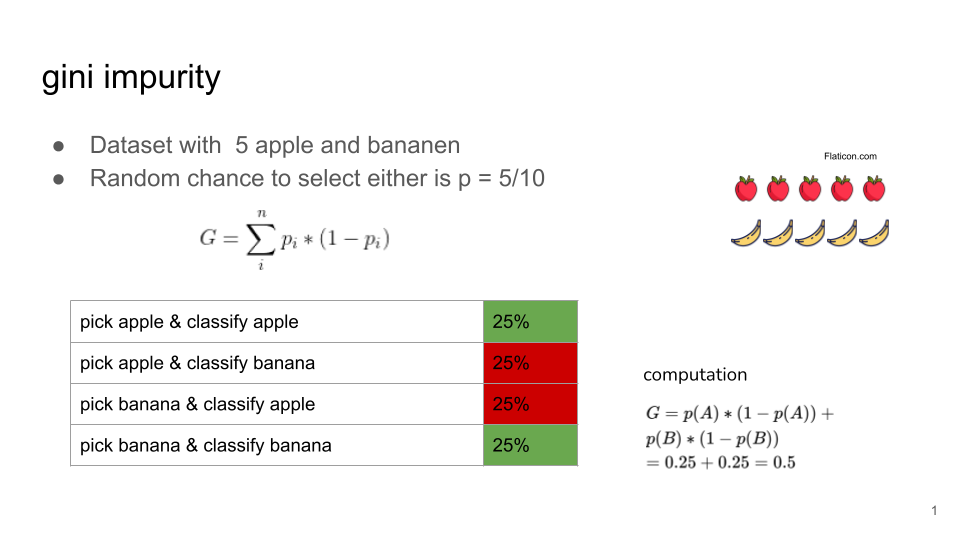

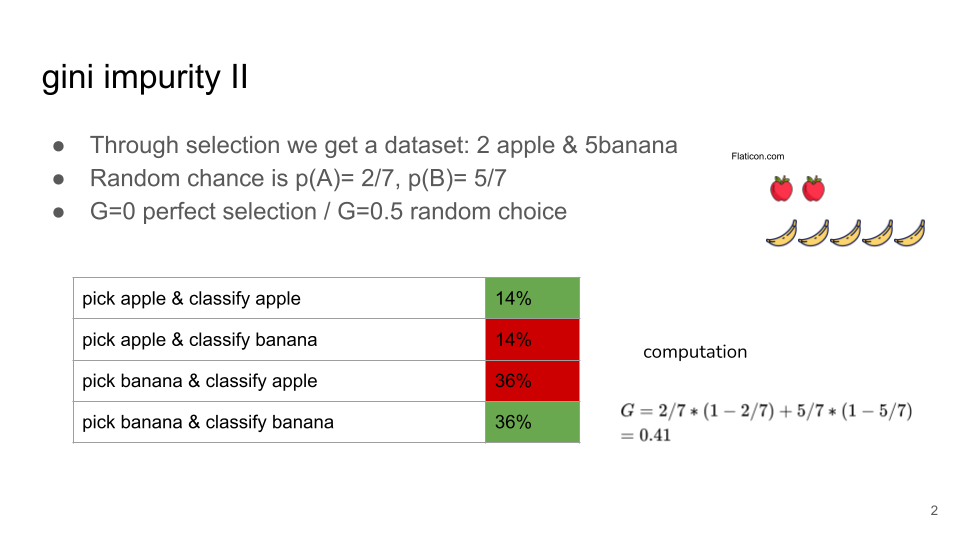

In [28]:
display(Image(filename="images/gini_impurit_1.png"), Image(filename="images/gini_impurity_2.png"))

### Confusion matrix

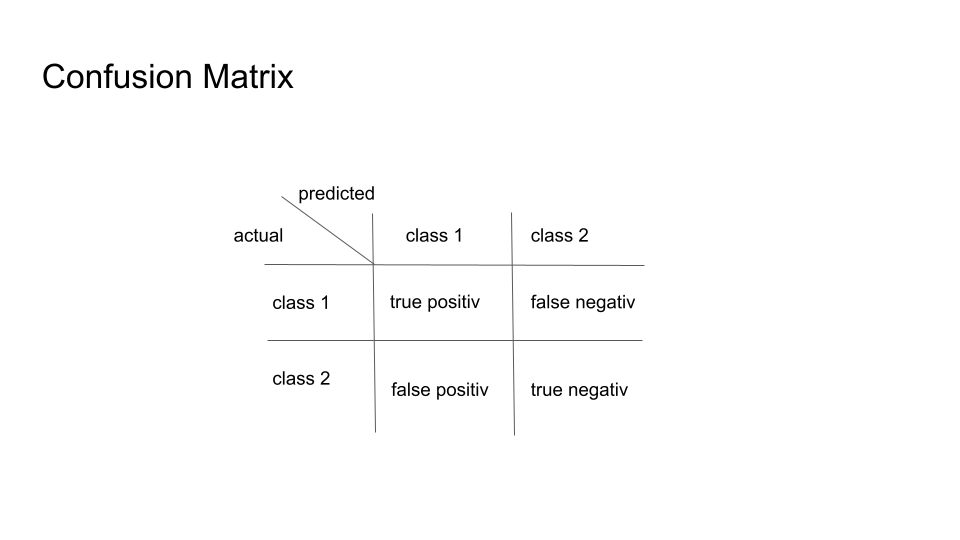

In [29]:
Image(filename='images/confusion.png')

In [30]:
prediction = classifier.predict(X)
confusion = confusion_matrix(y_true=Y, y_pred=prediction)
print(confusion)

[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


## Random Forest
A rather robust algorithm that can be used in a lot of scenarios. Belongs to the ensemble-tree-algorithm family.

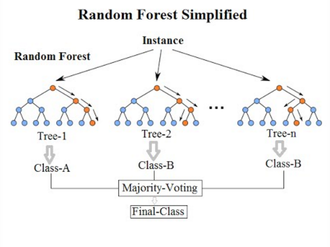

In [31]:
Image(filename='images/rnd_forest.png') 

In [32]:
from sklearn.ensemble import RandomForestClassifier
# see details in https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [33]:
rnd_classifier = RandomForestClassifier(n_estimators=10, criterion='gini', 
                                        max_depth=None, max_features='auto', max_leaf_nodes=None, 
                                        min_impurity_decrease=0.0, bootstrap=True, 
                                        n_jobs=None, random_state=None, verbose=0)
rnd_classifier.fit(X, Y)

RandomForestClassifier(n_estimators=10)

In [34]:
rnd_prediction = rnd_classifier.predict(X)
rnd_confusion = confusion_matrix(y_true=Y, y_pred=rnd_prediction)
print(rnd_confusion)

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


## Overfitting

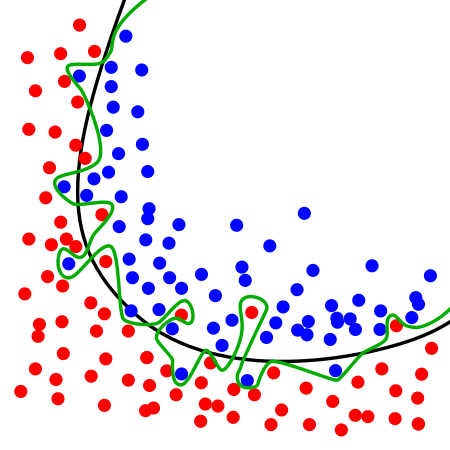

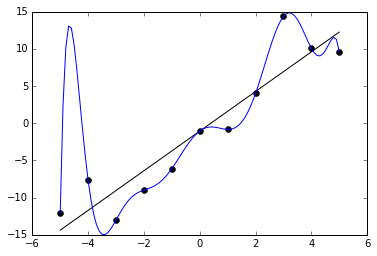

In [35]:
display(Image(filename='images/overfitting.png'), Image(filename='images/overfitting_2.png'))

## Cross Validation

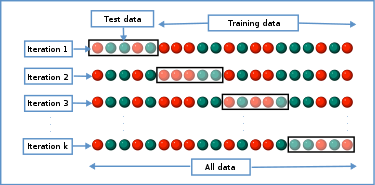

In [36]:
Image(filename='images/k-fold_cross_validation.png')